In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical #cate all
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#to_categorical?

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


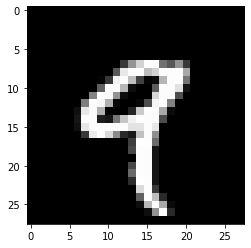

In [5]:
plt.imshow(X_train[y_train == 9][0], cmap='gray')

In [6]:
samples = []
for i in range(10):
    samples.append((X_train[y_train==i]).shape[0])

In [7]:
samples

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

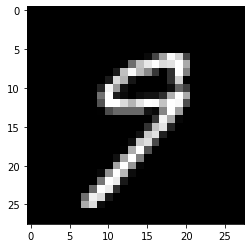

In [8]:
plt.imshow(X_train[y_train == 9][5948], cmap='gray')

In [9]:
y_train[59990:59999]

array([9, 2, 9, 5, 1, 8, 3, 5, 6], dtype=uint8)

In [10]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [11]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [12]:
y_train[59990:59999]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [13]:
# flatten
n_pixels = 784
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
print(X_train.shape)
print(X_test.shape)

X_train = X_train/255
X_test = X_test/255


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [14]:
def cread_model():
    model = Sequential()
    model.add(Dense(10, input_dim=n_pixels, activation="relu"))
    model.add(Dense(30, activation="relu"))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
def LeNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5) , input_shape=(28,28,1), activation='relu'))

In [16]:
#from google.colab import drive
#drive.mount('/content/drive')

In [18]:
model = cread_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs= 20, batch_size=200, verbose=1, shuffle=1)

ValueError: Error when checking input: expected dense_input to have 2 dimensions, but got array with shape (60000, 28, 28, 1)

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

NameError: name 'history' is not defined

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 1)
print(type(score))
print("accuracy: ",score[0])
print("loss: ",score[1])

In [ ]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)

plt.imshow(img)

In [ ]:
import cv2

img_arr = np.asarray(img)
resize = cv2.resize(img_arr, (28,28))
gray = cv2.cvtColor(resize, cv2.COLOR_RGB2GRAY)
image = cv2.bitwise_not(gray)
plt.imshow(image, cmap='gray')

In [ ]:
image = image/255 #normalized
image = image.reshape(1,784) #28*28 flatten

In [ ]:
predection = model.predict_classes(image)
print('predected digit: ', str(predection))

In [ ]:
i = plt.imread('download.png')
i = cv2.resize(i, (28,28))
i = cv2.cvtColor(i, cv2.COLOR_RGB2GRAY)
plt.imshow(i, cmap='gray')
i = i.reshape(1,784)
predection = model.predict_classes(i)
print('predected digit: ', str(predection))